In [49]:
# import the required packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot') 
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

In [50]:
# read the data and take a look it
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [51]:
df.shape

(7668, 15)

In [52]:
# missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [53]:
# data type for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

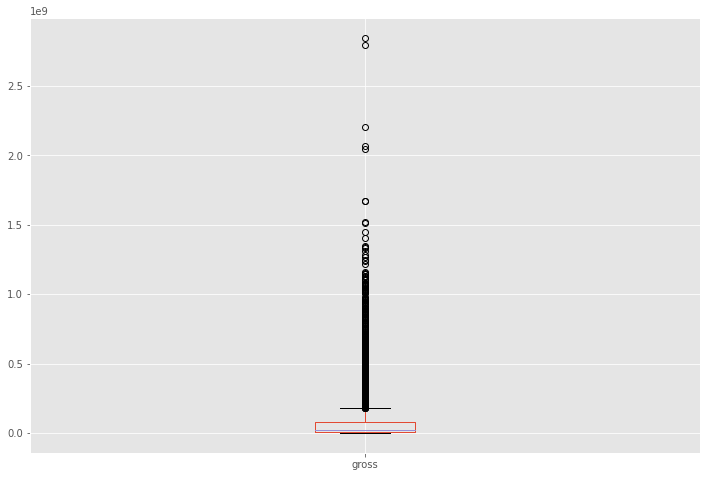

In [54]:
# Are there any Outliers?
df.boxplot(column=['gross'])

In [55]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [56]:
# order our data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


<AxesSubplot:xlabel='gross', ylabel='budget'>

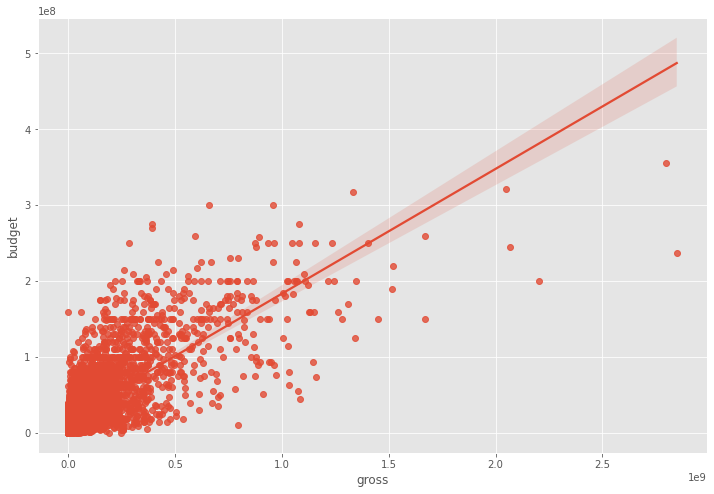

In [57]:
sns.regplot(x='gross', y='budget', data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

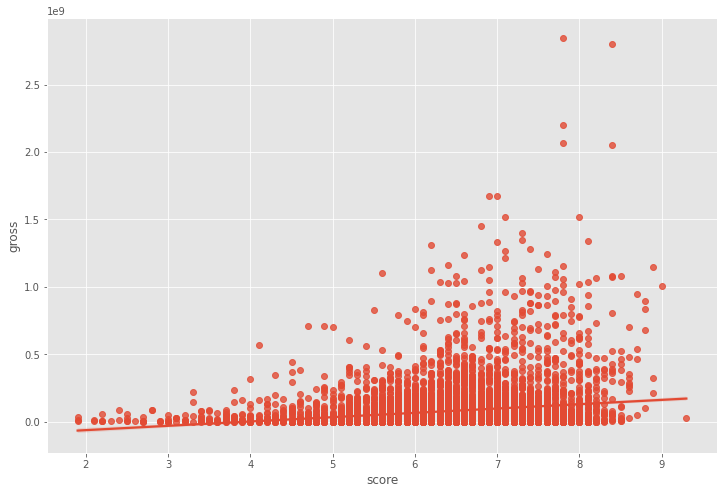

In [58]:
sns.regplot(x='score', y='gross', data=df)

In [59]:
# Correlation Matrix between all numeric columns
df.corr(method='pearson')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_5396\2928550999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<AxesSubplot:xlabel='gross', ylabel='budget'>

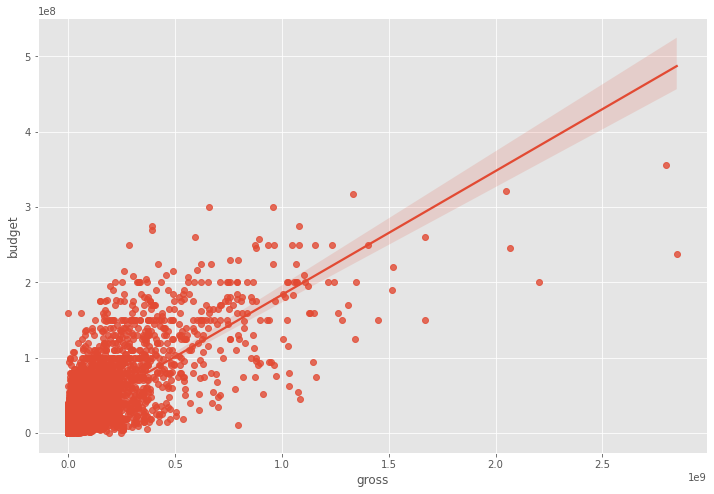

In [60]:
sns.regplot(x='gross', y='budget', data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

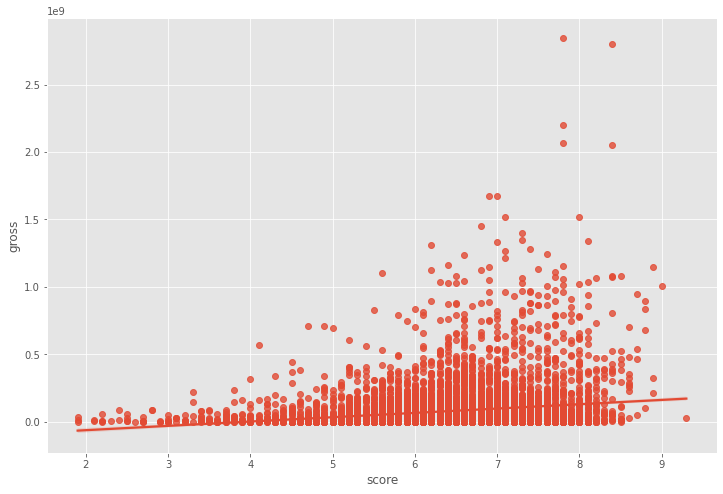

In [61]:
sns.regplot(x='score', y='gross', data=df)

In [62]:
# correlation matrix between all numeric columns
df.corr(method='pearson')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_5396\1101985735.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [63]:
df.corr(method='kendall')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_5396\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [64]:
df.corr(method = 'spearman')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_5396\875244283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_5396\1725534303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


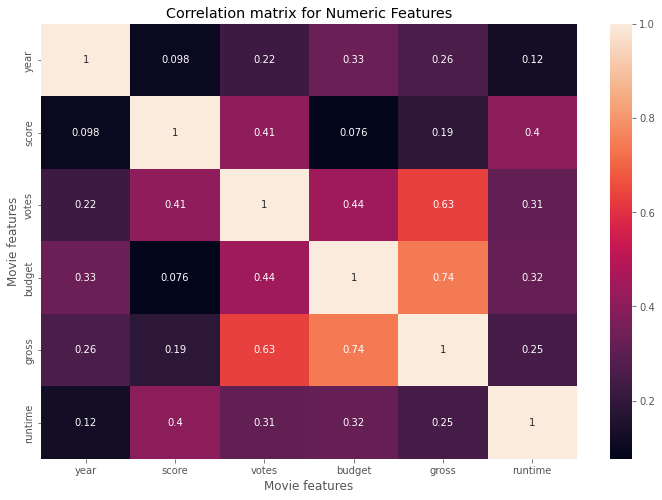

In [65]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [66]:
# Using factorize - this assigns a random numeric value for each ...
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


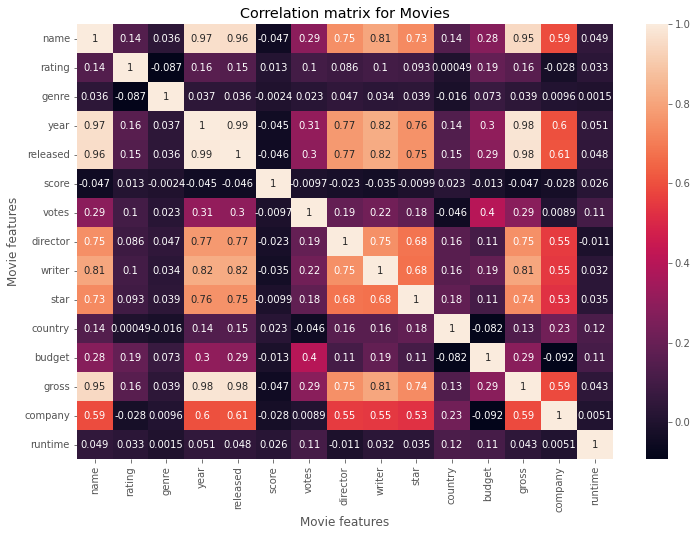

In [67]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Movies')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [68]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.124154
         budget      0.112097
         gross       0.042978
         company     0.005137
         runtime     1.000000
Length: 225, dtype: float64


In [69]:
sorted_pairs = corr_pairs.sort_values(kind='quicksort')
print(sorted_pairs)

budget   company   -0.092249
company  budget    -0.092249
genre    rating    -0.086723
rating   genre     -0.086723
budget   country   -0.082082
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [70]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company    0.527116
company   star       0.527116
          writer     0.546151
writer    company    0.546151
director  company    0.552258
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64


In [71]:
# Looking at the top 15 companies by gross revenue
CompanyGrossSum = df.groupby('company')[['gross']].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [73]:
df['Year'] = df['released'].str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [74]:
df.groupby(['company', 'year'])[['gross']].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [75]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [76]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

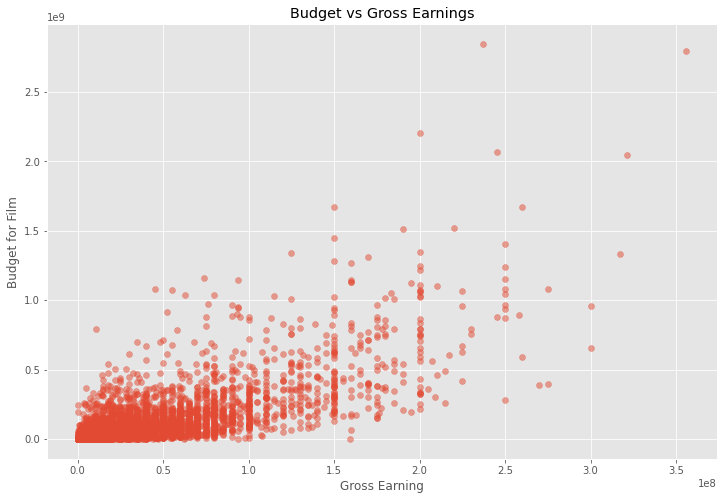

In [77]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

In [78]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980


In [79]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0,1
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0,0


In [80]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027606


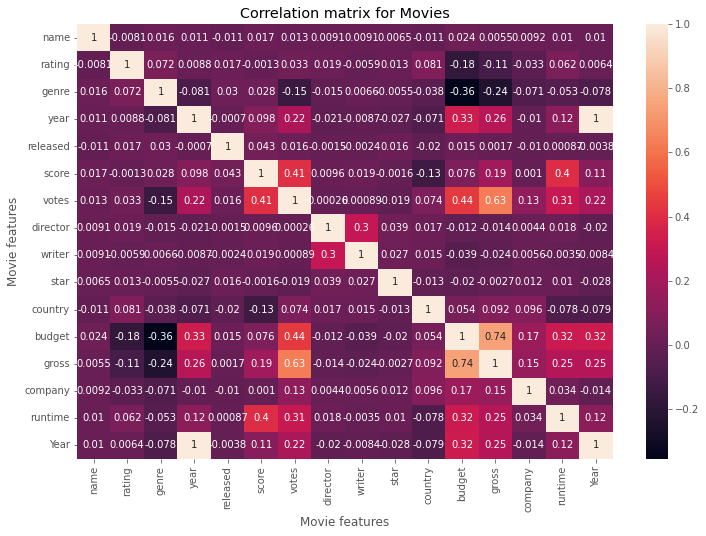

In [81]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [82]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0


In [83]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.head(30)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.607954
company   released    0.607954
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
gross     star        0.735680
star      gross       0.735680
director  name        0.745905
name      director    0.745905
writer    director    0.748340
director  writer      0.748340
gross     director    0.750911
director  gross       0.750911
released  star        0.754468
star      released    0.754468
dtype: float64